In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
def pv(variable):
    print(variable, ":", eval(variable))

In [2]:
import numpy as np
# Please note again that we are using 0 to represent heads, and 1 to represent tails.

## simulate 1 million tests of two fair coin flips

In [3]:
# simulate 1 million tests of two fair coin flips
tests = np.random.randint(2, size=(int(1e6), 2))

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly two heads
(test_sums == 0).mean()


0.250494

### Mathematics verification

In [4]:
p_h = 0.5
p_t = p_h
flips = 2
p_two_heads = p_h**flips
p_two_heads

0.25

In [5]:
# simulate 1 million tests of three fair coin flips
tests = np.random.randint(2, size=(int(1e6), 3))
tests


# sums of all tests
test_sums = tests.sum(axis=1)
test_sums


# proportion of tests that produced exactly one head
# One head on 3 flips = 1 + 0 + 0 = 1
one_head = (test_sums == 1)
one_head
np.bincount(one_head)[1]
(one_head == True).sum()
np.count_nonzero(one_head == True)
#len(test_sums == 1)
p_one_head=np.bincount(one_head)[1]/(np.bincount(one_head)[0]+np.bincount(one_head)[1])
p_one_head


array([[0, 1, 1],
       [0, 0, 0],
       [1, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 1]])

array([2, 0, 2, ..., 1, 1, 2])

array([False, False, False, ...,  True,  True, False])

375337

375337

375337

0.375337

### Mathematics verification - Binomial Distribution

In [6]:
import math
p_h = 0.5
p_t = p_h
n_flips = 3
k_heads = 1

def binomial_distribution(p, n, k):
    return math.factorial(n) / ( math.factorial(n - k) * math.factorial(k)) * p**k * (1-p)**(n-k)

p_one_head = math.factorial(n_flips) / ( math.factorial(n_flips - k_heads) * math.factorial(k_heads)) * p_h**k_heads * (1-p_h)**(n_flips-k_heads)
p_one_head
binomial_distribution(p_h, n_flips,  k_heads)

0.375

0.375

## Three biased coin flips with P(H) = 0.6 produce exactly one head

In [7]:
# simulate 1 million tests of three biased coin flips
# hint: use np.random.choice()
tests = np.random.choice(a=2, size=(int(1e6), 3), p=[0.4, 0.6])
tests
# sums of all tests
test_sums = tests.sum(axis=1)
test_sums
# proportion of tests that produced exactly one head
one_head = (test_sums == 1)
p_one_head=np.bincount(one_head)[1]/(np.bincount(one_head)[0]+np.bincount(one_head)[1])
p_one_head

array([[0, 0, 1],
       [1, 1, 0],
       [1, 0, 0],
       ...,
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1]])

array([1, 2, 1, ..., 0, 3, 3])

0.28784

### Mathematics verification

In [8]:
binomial_distribution(0.6, 3, 1)

0.28800000000000003

## 4. A die rolls an even number

In [9]:
# simulate 1 million tests of one die roll
#tests = np.random.choice(6, size=(int(1e6),1), p=[0.5, 0.1, 0.1, 0.1, 0.1, 0.1])+1
tests = np.random.randint(6, size=(int(1e6),1))+1
tests
tests.min()
tests.max()
tests.mean()
# proportion of tests that produced an even (pair) number
odd = ( tests & 0x1)
odd = odd.flatten()
odd
even_odd = np.bincount(odd)
even_odd
odd_number = even_odd[0]
odd_number
even_number = even_odd[1]
even_number
p_even = even_number / (even_number + odd_number)
p_even

array([[1],
       [4],
       [5],
       ...,
       [4],
       [6],
       [6]])

1

6

3.498754

array([1, 0, 1, ..., 0, 0, 0])

array([499574, 500426])

499574

500426

0.500426

### Mathematics verification

In [10]:
# 1 , 2, 3, 4, 5, 6
p_even = 3/6
p_even

0.5

## 5. Two dice roll a double

In [11]:
# simulate the first million die rolls
first = np.random.randint(6, size=(int(1e6),1))+1

# simulate the second million die rolls
second = np.random.randint(6, size=(int(1e6),1))+1

# proportion of tests where the 1st and 2nd die rolled the same number
tests = (first == second).flatten()
np.bincount(tests)
p_same = np.bincount(tests)[1] / (np.bincount(tests)[1] + np.bincount(tests)[0])
p_same

array([833078, 166922])

0.166922

In [12]:
np.bincount([True, False, False])
np.bincount([False, True, False])
np.bincount([True, True, False])

array([2, 1])

array([2, 1])

array([1, 2])

### Mathematics verification

In [13]:
# It's the probability to roll a given number (the number of the first roll)
p_same = 1/6
p_same

0.16666666666666666

# Simulating Many Coin Flips

In [14]:
# number of heads from 10 fair coin flips
np.random.binomial(10, 0.5)

4

In [15]:
# results from 20 tests with 10 coin flips
np.random.binomial(10, 0.5, 20)

array([5, 4, 8, 7, 6, 6, 5, 4, 5, 4, 6, 6, 5, 6, 6, 7, 6, 4, 5, 6])

In [16]:
# mean number of heads from the 20 tests
np.random.binomial(10, 0.5, 20).mean()

5.8

In [17]:
# reflects the fairness of the coin more closely as # tests increases
np.random.binomial(10, 0.5, 1000000).mean()

4.998086

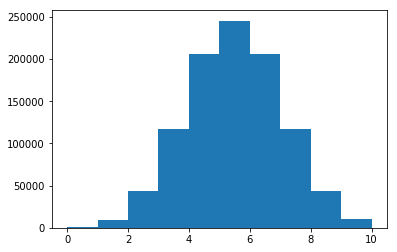

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(np.random.binomial(10, 0.5, 1000000));

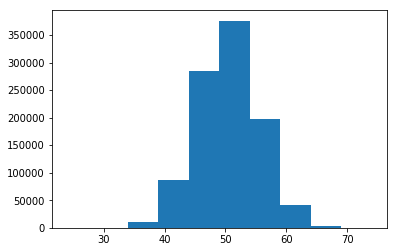

In [19]:
# gets more narrow as number of flips increase per test
plt.hist(np.random.binomial(100, 0.5, 1000000));

# Binomial Distributions

In [20]:
# simulate 1 million tests of one fair coin flip
# remember, the output of these tests are the # successes, or # heads
tests = np.random.binomial(1, 0.5, int(1e6))

# proportion of tests that produced heads
(tests == 1).mean()

0.499446

In [21]:
p_h=1/2
p_h

0.5

In [22]:
# simulate 1 million tests of five fair coin flips
tests = np.random.binomial(5, 0.5, int(1e6))
tests
# proportion of tests that produced 1 head
(tests == 1).mean()

array([1, 0, 1, ..., 2, 2, 3])

0.155633

In [23]:
binomial_distribution(0.5, 5, 1)

0.15625

In [24]:
# simulate 1 million tests of ten fair coin flips
tests = np.random.binomial(10, 0.5, int(1e6))

# proportion of tests that produced 4 heads
(tests == 4).mean()

0.205427

In [25]:
binomial_distribution(p=0.5, n=10, k=4)

0.205078125

In [26]:
# simulate 1 million tests of five biased coin flips
tests = np.random.binomial(5, 0.8, int(1e6))

# proportion of tests that produced 5 heads
(tests == 5).mean()

0.327921

In [27]:
binomial_distribution(0.8, 5, 5)

0.3276800000000001

In [28]:
# simulate 1 million tests of ten biased coin flips
tests = np.random.binomial(10, 0.15, int(1e6))

# proportion of tests that produced at least 3 heads
(tests >= 3).mean()

0.179355

In [29]:
p_h = 0
for heads in range(3,10+1):
    p_heads = binomial_distribution(0.15, 10, heads)
    p_h += p_heads
    print("Prob of ", heads, ":", p_heads, " Total :", p_h)
p_h

Prob of  3 : 0.1298337207539062  Total : 0.1298337207539062
Prob of  4 : 0.0400957078798828  Total : 0.16992942863378901
Prob of  5 : 0.008490855786328123  Total : 0.17842028442011715
Prob of  6 : 0.001248655262695312  Total : 0.17966893968281247
Prob of  7 : 0.00012591481640624995  Total : 0.17979485449921873
Prob of  8 : 8.332598144531246e-06  Total : 0.17980318709736326
Prob of  9 : 3.267685546874999e-07  Total : 0.17980351386591795
Prob of  10 : 5.7665039062499975e-09  Total : 0.17980351963242186


0.17980351963242186

# Cancer Test Results

In [30]:
import pandas as pd
# load dataset
df = pd.read_csv("cancer_test_data.csv")
df.head(3)
patients = len(df)
print("# number of patients",patients)

with_cancer = len(df[(df['has_cancer'] == True)])
print("number of patients with cancer", with_cancer)
no_cancer = len(df[(df['has_cancer'] == False)])
print("number of patients without cancer", no_cancer)
print("proportion of patients with cancer", with_cancer / patients)
print("proportion of patients without cancer", no_cancer / patients)
pos_test_with_cancer = len(
    df[(df['has_cancer'] == True)
       & (df['test_result'] == 'Positive')]
                  )
print("proportion of patients with cancer who test positive", pos_test_with_cancer / with_cancer)
neg_test_with_cancer = len(    df[(df['has_cancer'] == True)   & (df['test_result'] == 'Negative')]         )
print("proportion of patients with cancer who test negative",neg_test_with_cancer / with_cancer)
pos_test_no_cancer = len(    df[(df['has_cancer'] == False)   & (df['test_result'] == 'Positive')]         )
print("proportion of patients without cancer who test positive",pos_test_no_cancer / no_cancer)
neg_test_no_cancer = len(    df[(df['has_cancer'] == False)   & (df['test_result'] == 'Negative')]         )
print("proportion of patients without cancer who test negative",neg_test_no_cancer / no_cancer)

,patient_id,test_result,has_cancer
0,79452,Negative,False
1,81667,Positive,True
2,76297,Negative,False


# number of patients 2914
number of patients with cancer 306
number of patients without cancer 2608
proportion of patients with cancer 0.10501029512697323
proportion of patients without cancer 0.8949897048730268
proportion of patients with cancer who test positive 0.9052287581699346
proportion of patients with cancer who test negative 0.09477124183006536
proportion of patients without cancer who test positive 0.2036042944785276
proportion of patients without cancer who test negative 0.7963957055214724


# Conditional Probability & Bayes Rule Quiz
In the previous section, you found the following proportions from the cancer results dataset.

    Patients with cancer: 0.105
    Patients without cancer: 0.895
    Patients with cancer who tested positive: 0.905
    Patients with cancer who tested negative: 0.095
    Patients without cancer who tested positive: 0.204
    Patients without cancer who tested negative: 0.796

    Based on the above proportions observed in the data, we can assume the following probabilities.
    Probability 	Meaning
    P(cancer) = 0.105 	Probability a patient has cancer
    P(~cancer) = 0.895 	Probability a patient does not have cancer
    P(positive|cancer) = 0.905 	Probability a patient with cancer tests positive
    P(negative|cancer) = 0.095 	Probability a patient with cancer tests negative
    P(positive|~cancer) = 0.204 	Probability a patient without cancer tests positive
    P(negative|~cancer) = 0.796 	Probability a patient without cancer tests negative

In [31]:
p_cancer = 0.105
p_no_cancer = 0.895
p_pos_when_cancer = 0.905
p_pos_whithout_cancer = 0.204
p_pos_and_no_cancer = p_pos_whithout_cancer * p_no_cancer
p_cancer_and_pos = p_pos_when_cancer * p_cancer
p_pos = p_cancer * p_pos_when_cancer + p_no_cancer * p_pos_whithout_cancer
p_cancer_when_pos = p_cancer_and_pos / p_pos
print("Probability a patient who tested positive has cancer, or P(cancer|positive)", p_cancer_when_pos)
p_no_cancer_when_pos = p_pos_and_no_cancer / p_pos
print("Probability a patient who tested positive doesn't have cancer, or P(~cancer|positive)", p_no_cancer_when_pos)

p_neg_given_cancert = 0.095
p_neg_given_no_cancert = 0.796
p_neg = p_cancer * p_neg_given_cancert + p_no_cancer * p_neg_given_no_cancert
p_neg_and_cancer = p_cancer * p_neg_given_cancert
p_cancer_when_neg = p_neg_and_cancer / p_neg
print("Probability a patient who tested negative has cancer, or P(cancer|negative)", p_cancer_when_neg)
p_neg_and_no_cancer = p_neg_given_no_cancert * p_no_cancer
p_no_cancer_when_neg = p_neg_and_no_cancer / p_neg
print("Probability a patient who tested negative doesn't have cancer, or P(~cancer|negative)", p_no_cancer_when_neg)


Probability a patient who tested positive has cancer, or P(cancer|positive) 0.34230291241151994
Probability a patient who tested positive doesn't have cancer, or P(~cancer|positive) 0.65769708758848
Probability a patient who tested negative has cancer, or P(cancer|negative) 0.013808235106832134
Probability a patient who tested negative doesn't have cancer, or P(~cancer|negative) 0.986191764893168


## Or more simple

In [32]:
df.query('test_result == "Negative"')['has_cancer'].mean()

0.013770180436847104

# Normal Distribution

# Sampling Distribution

Find the proportion of students who drink coffee in the above array. Store this value in a variable p.
Use numpy's random.choice to simulate 5 draws from the students array.     What is proportion of your sample drink coffee?
Repeat the above to obtain 10,000 additional proportions, where each sample was of size 5.       Store these in a variable called sample_props.
What is the mean proportion of all 10,000 of these proportions ?     This is often called the mean of the sampling distribution.
What are the variance and standard deviation for the original 21 data values?
mean 0.7142857142857143 var 0.20408163265306126 std 0.45175395145262565
What are the variance and standard deviation for the 10,000 proportions you created?
mean 0.714 var 0.20420400000000002 std 0.45188936699152377

7.Compute p(1-p), which of your answers does this most closely match?
p * (1-p) 0.20408163265306123
p_sample * (1-p_sample) 0.24

8. Compute p(1-p)/n, which of your answers does this most closely match?
p *

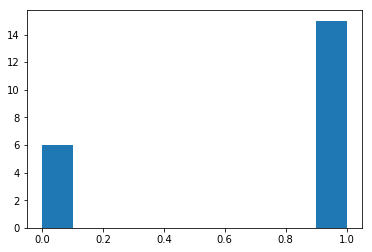

In [33]:
import numpy as np
np.random.seed(42)

students = np.array([1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0])
n = students.shape[0]
n
print("Find the proportion of students who drink coffee in the above array. Store this value in a variable p.")
p = (students == 1).sum() / students.shape[0]
# Or shorter :
p = students.mean()
p
print("Use numpy's random.choice to simulate 5 draws from the students array. \
    What is proportion of your sample drink coffee?")
indexes = np.random.choice(students, size=5)
sample = students[indexes]
n_sample = sample.shape[0]
p_sample = (sample == 1).sum() / sample.shape[0]
p_sample
print("Repeat the above to obtain 10,000 additional proportions, where each sample was of size 5.\
       Store these in a variable called sample_props.")
sample_props = np.random.choice(students, size=(10000,5))
sample_props
print("What is the mean proportion of all 10,000 of these proportions ? \
    This is often called the mean of the sampling distribution.")
sample_props.mean()
print("What are the variance and standard deviation for the original 21 data values?")
print("mean", students.mean(), "var", students.var(), "std", students.std())
print("What are the variance and standard deviation for the 10,000 proportions you created?")
print("mean", sample_props.mean(), "var", sample_props.var(), "std", sample_props.std())
print("\n7.Compute p(1-p), which of your answers does this most closely match?")
print("p * (1-p)", p * (1-p) )
print("p_sample * (1-p_sample)", p_sample * (1-p_sample))

print("\n8. Compute p(1-p)/n, which of your answers does this most closely match?")
#print("p * (1-p)/n", p * (1-p)/n)
#print("p_sample * (1-p_sample)/n_sample", p_sample * (1-p_sample)/n_sample)
print("p * (1-p)/n_sample", p * (1-p)/n_sample)

print("9. Notice that your answer to 8. is commonly called the variance of the sampling distribution.")



print("\nIf you were to change your first sample to be 20, \
    what would this do for the variance of the sampling distribution? \
    Simulate and calculate the new answers in 6. and 8.\
    to check that the consistency you found before still holds.")
sample_20 = students[np.random.choice(students, size=20)]
n_sample = sample_20.shape[0]
p_sample = sample_20.mean()
print("p_sample (ie mean)", p_sample)
print("p * (1-p)/n_sample", p * (1-p)/n_sample)

print("mean", sample_20.mean(), "var", sample_20.var(), "std", sample_20.std())
print("\nRepeat the above to obtain 10,000 additional proportions, where each sample was of size 5. Store these in a variable called sample_props.")
sample_props = np.random.choice(students, size=(10000,5))
sample_props

print("10. Finally, plot a histgram of the 10,000 draws from both the proportions with a sample size of 5 and the proportions with a sample size of 20. Each of these distributions is a sampling distribution. One is for the proportions of sample size 5 and the other a sampling distribution for proportions with sample size 20.")
print("")

print("students")
plt.hist(students);
plt.show();


sample_props


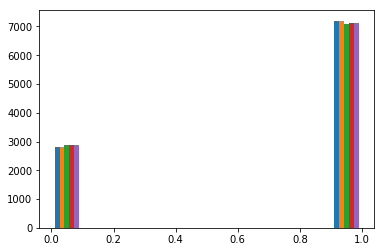

In [34]:
print("sample_props")
plt.hist(sample_props);
plt.show();


sample_20


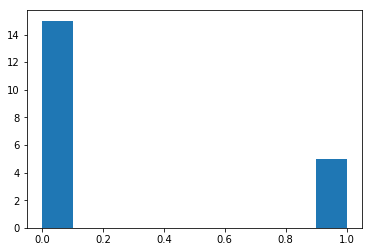

In [35]:
print("sample_20")
plt.hist(sample_20);
plt.show();

# Notation

(array([1663.,  747.,  329.,  134.,   73.,   34.,   13.,    5.,    0.,
           2.]),
 array([1.16348231e-03, 8.17255031e+01, 1.63449843e+02, 2.45174182e+02,
        3.26898522e+02, 4.08622862e+02, 4.90347201e+02, 5.72071541e+02,
        6.53795881e+02, 7.35520220e+02, 8.17244560e+02]),
 <a list of 10 Patch objects>)

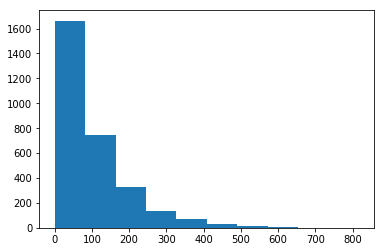

pop_data.mean()


100.35978700795846

sample_10.mean()


103.47556549464393

 sample standard deviation of your 10 draws


130.00074035573317

population standard deviation


99.77860187968906

population variance


9955.76939306549

sample variance


16900.192493038754

In [36]:
np.random.seed(42)
pop_data = np.random.gamma(1,100, 3000)
plt.hist(pop_data);
plt.show();
print("pop_data.mean()")
pop_data.mean()
print("sample_10.mean()")
sample_10 = np.random.choice(pop_data, size=10)
sample_10.mean()
print(" sample standard deviation of your 10 draws")
sample_10.std()
print("population standard deviation")
pop_data.std()
print("population variance")
pop_data.var()
print("sample variance")
sample_10.var()


# Central Limit Theorem

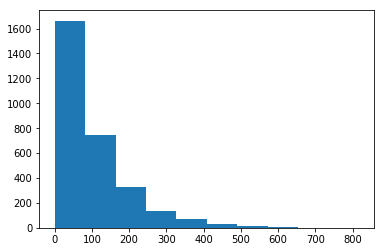

In [37]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data);

1. In order to create the sampling distribution for the average of 3 draws of this distribution, follow these steps:

a. Use numpy's random.choice to simulate 3 draws from the pop_data array.

b. Compute the mean of these 3 draws.

c. Write a loop to simulate this process 10,000 times, and store each mean into an array called means_size_3.

d. Plot a histogram of your sample means.

e. Use means_size_3 and pop_data to answer the quiz questions below.


(array([2.033e+03, 3.687e+03, 2.476e+03, 1.133e+03, 4.720e+02, 1.350e+02,
        4.200e+01, 1.700e+01, 3.000e+00, 2.000e+00]),
 array([  3.33913192,  52.06020861, 100.78128531, 149.502362  ,
        198.2234387 , 246.94451539, 295.66559209, 344.38666878,
        393.10774548, 441.82882217, 490.54989887]),
 <a list of 10 Patch objects>)

pop_data.mean() : 100.35978700795846
means_size_3.mean() : 100.87276259567305
pop_data.std() : 99.77860187968906
means_size_3.std() : 57.72348461511113


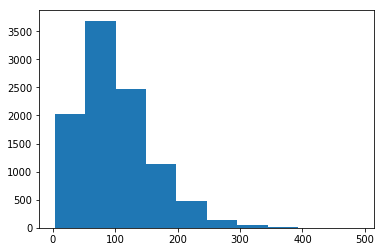

In [38]:

sample = np.random.choice(pop_data, size=3)
#sample
means_size_3 = np.array([])
for i in range(0,10000):
    means_size_3 = np.append(means_size_3, np.random.choice(pop_data, size=3).mean())
#pv("means_size_3")
plt.hist(means_size_3);
pv("pop_data.mean()")
pv("means_size_3.mean()")
pv("pop_data.std()")
pv("means_size_3.std()")

# Central Limit Theorem - Part II

(array([1663.,  747.,  329.,  134.,   73.,   34.,   13.,    5.,    0.,
           2.]),
 array([1.16348231e-03, 8.17255031e+01, 1.63449843e+02, 2.45174182e+02,
        3.26898522e+02, 4.08622862e+02, 4.90347201e+02, 5.72071541e+02,
        6.53795881e+02, 7.35520220e+02, 8.17244560e+02]),
 <a list of 10 Patch objects>)

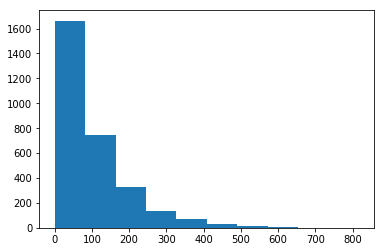

sample.mean() : 115.89760480820178


(array([  22.,  167.,  815., 2205., 2924., 2297., 1158.,  326.,   76.,
          10.]), array([ 65.40255233,  72.93722432,  80.47189631,  88.00656829,
         95.54124028, 103.07591227, 110.61058426, 118.14525625,
        125.67992824, 133.21460023, 140.74927222]), <a list of 10 Patch objects>)

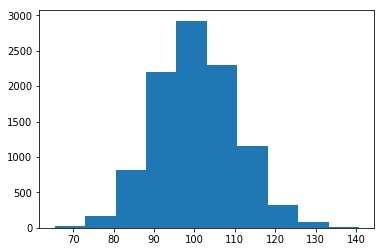

pop_data.mean() : 100.35978700795846
means_size_100.mean() : 100.45707456518824
pop_data.std() : 99.77860187968906
means_size_100.std() : 9.971979588536067
pop_data.var() : 9955.76939306549
means_size_100.var() : 99.44037691417994


In [39]:
np.random.seed(42)

pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data);
plt.show()

sample = np.random.choice(pop_data, size=100)
pv("sample.mean()")

means_size_100 = np.array([])
for i in range(0,10000):
    means_size_100 = np.append(means_size_100, np.random.choice(pop_data, size=100).mean())
#pv("means_size_3")
plt.hist(means_size_100);
plt.show()
pv("pop_data.mean()")
pv("means_size_100.mean()")
pv("pop_data.std()")
pv("means_size_100.std()")
pv("pop_data.var()")
pv("means_size_100.var()")

# Central Limit Theorem - Part III

(array([1663.,  747.,  329.,  134.,   73.,   34.,   13.,    5.,    0.,
           2.]),
 array([1.16348231e-03, 8.17255031e+01, 1.63449843e+02, 2.45174182e+02,
        3.26898522e+02, 4.08622862e+02, 4.90347201e+02, 5.72071541e+02,
        6.53795881e+02, 7.35520220e+02, 8.17244560e+02]),
 <a list of 10 Patch objects>)

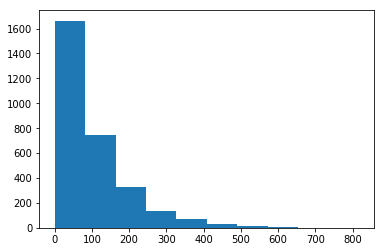

sample.var() : 12098.749344943082


(array([ 176., 1338., 2857., 2728., 1695.,  758.,  315.,   91.,   32.,
          10.]),
 array([ 3615.72815393,  5472.35978523,  7328.99141652,  9185.62304782,
        11042.25467911, 12898.88631041, 14755.51794171, 16612.149573  ,
        18468.7812043 , 20325.41283559, 22182.04446689]),
 <a list of 10 Patch objects>)

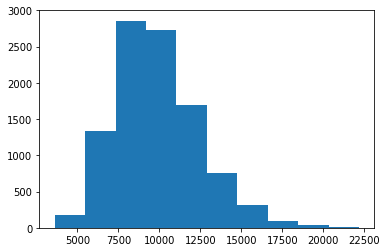

pop_data.var() : 9955.76939306549
var_size_100.var() : 6508086.114509583
pop_data.std() : 99.77860187968906
var_size_100.mean() : 9874.361793621825
pop_data.var() : 9955.76939306549
var_size_100.var() : 6508086.114509583


In [40]:
np.random.seed(42)

pop_data = np.random.gamma(1,100,3000)
plt.hist(pop_data);
plt.show()
sample = np.random.choice(pop_data, size=100)
pv("sample.var()")

var_size_100 = np.array([])
for i in range(0,10000):
    var_size_100 = np.append(var_size_100, np.random.choice(pop_data, size=100).var())
#pv("means_size_3")
plt.hist(var_size_100);
plt.show()
pv("pop_data.var()")
pv("var_size_100.var()")
pv("pop_data.std()")
pv("var_size_100.mean()")
pv("pop_data.var()")
pv("var_size_100.var()")

# Bootstrap Sampling

array([4, 5, 3, 5, 5, 2, 3, 3, 3, 5, 4, 3, 6, 5, 2, 4, 6, 6, 2, 4])

# Confidence Intervals for the Population Mean

nb_drinks_coffee/200 : 0.595
1-nb_drinks_coffee/200 : 0.405
drinks_coffee['height'].mean() : 68.11962990858618
coffee_red[(coffee_red['drinks_coffee'] == False)]['height'].mean() : 66.78492279927877
nb_drinks_coffee/200 : 0.605
1-nb_drinks_coffee/200 : 0.395
drinks_coffee['height'].mean() : 68.25918199231297
coffee_new[(coffee_new['drinks_coffee'] == False)]['height'].mean() : 66.28588551349722


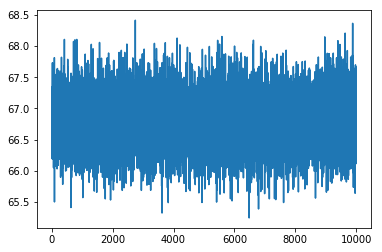

(array([  16.,  106.,  590., 1831., 2989., 2644., 1352.,  377.,   86.,
           9.]),
 array([65.24631713, 65.56293231, 65.8795475 , 66.19616268, 66.51277787,
        66.82939305, 67.14600823, 67.46262342, 67.7792386 , 68.09585379,
        68.41246897]),
 <a list of 10 Patch objects>)

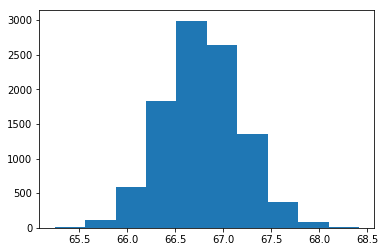

lower, upper : (65.9929132815752, 67.58402738281573)
coffee_full[(coffee_full['drinks_coffee'] == False)]['height'].mean() : 66.44340776214705


In [70]:

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.
#coffee_red.head()
drinks_coffee = coffee_red[(coffee_red['drinks_coffee'] == True)]
nb_drinks_coffee = len(drinks_coffee)
pv("nb_drinks_coffee/200")
pv("1-nb_drinks_coffee/200")
pv("drinks_coffee['height'].mean()")
pv("coffee_red[(coffee_red['drinks_coffee'] == False)]['height'].mean()")

# Simulate 200 "new" individuals from your original sample of 200. What are the proportion of coffee drinkers in your bootstrap sample? How about individuals that don't drink coffee?3
coffee_new = coffee_red.sample(200, replace=True)
#coffee_new.head()
drinks_coffee = coffee_new[(coffee_new['drinks_coffee'] == True)]
nb_drinks_coffee = len(drinks_coffee)
pv("nb_drinks_coffee/200")
pv("1-nb_drinks_coffee/200")
pv("drinks_coffee['height'].mean()")
pv("coffee_new[(coffee_new['drinks_coffee'] == False)]['height'].mean()")
boot_means = []
for _ in range(10_000):
    nb_sample = 200
    boot_sample = coffee_red.sample(nb_sample, replace=True)
    boot_means.append(boot_sample[(boot_sample['drinks_coffee'] == False)]['height'].mean())
plt.plot(all_mean_height_no_drinker)
plt.show()
plt.hist(all_mean_height_no_drinker)
plt.show()
lower, upper = np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)
pv("lower, upper")

pv("coffee_full[(coffee_full['drinks_coffee'] == False)]['height'].mean()")



In [71]:
pv("coffee_red[(coffee_red['drinks_coffee'] == False)]['height'].mean()")
pv("coffee_full[(coffee_full['drinks_coffee'] == False)]['height'].mean()")

coffee_red[(coffee_red['drinks_coffee'] == False)]['height'].mean() : 66.78492279927877
coffee_full[(coffee_full['drinks_coffee'] == False)]['height'].mean() : 66.44340776214705


# Confidence Interval - Difference In Means¶

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561


(array([  24.,  109.,  546., 1516., 2623., 2826., 1664.,  568.,  106.,
          18.]),
 array([-0.43028277, -0.07929544,  0.2716919 ,  0.62267923,  0.97366656,
         1.3246539 ,  1.67564123,  2.02662857,  2.3776159 ,  2.72860323,
         3.07959057]),
 <a list of 10 Patch objects>)

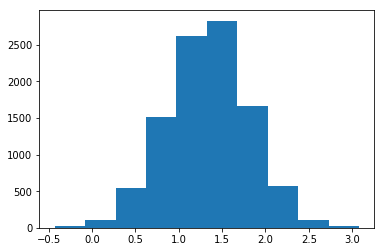

lower, upper : (0.10258900080921124, 0.10258900080921124)
full_data[(full_data['drinks_coffee'] == True)]['height'].mean() - full_data[(full_data['drinks_coffee'] == False)]['height'].mean()  : 1.9568024933369657


In [77]:
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)
sample_data.head(3)
# 1. For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers. Build a 99% confidence interval using your sampling distribution. Use your interval to start answering the first quiz question below.

boot_diff = []
for _ in range(10_000):
    nb_sample = 200
    boot_sample = sample_data.sample(nb_sample, replace=True)
    coffee_mean = boot_sample[(boot_sample['drinks_coffee'] == True)]['height'].mean()
    no_coffee_mean = boot_sample[(boot_sample['drinks_coffee'] == False)]['height'].mean()
    boot_diff.append(coffee_mean - no_coffee_mean)
plt.hist(boot_diff)
plt.show()
lower, upper = np.percentile(boot_diff, 0.5), np.percentile(boot_diff, 99.5)
pv("lower, upper")

pv("full_data[(full_data['drinks_coffee'] == True)]['height'].mean() - full_data[(full_data['drinks_coffee'] == False)]['height'].mean() ")


(array([   5.,   35.,  265., 1116., 2646., 3061., 2009.,  702.,  150.,
          11.]),
 array([2.78783612, 3.06299912, 3.33816213, 3.61332513, 3.88848813,
        4.16365114, 4.43881414, 4.71397715, 4.98914015, 5.26430316,
        5.53946616]),
 <a list of 10 Patch objects>)

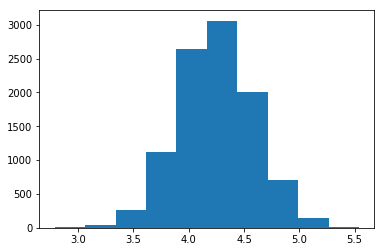

lower, upper : (3.350274589725852, 5.109059900189764)
full_data[(full_data['age'] == '>=21')]['height'].mean() - full_data[(full_data['age'] == '<21')]['height'].mean()  : 3.88229124992111


In [91]:

# 2. For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21. Build a 99% confidence interval using your sampling distribution. Use your interval to finish answering the first quiz question below. 
boot_diff = []
for _ in range(10_000):
    nb_sample = 200
    boot_sample = sample_data.sample(nb_sample, replace=True)
    older_mean = boot_sample[(boot_sample['age'] == ">=21")]['height'].mean()
    younger_mean = boot_sample[(boot_sample['age'] == "<21")]['height'].mean()
    boot_diff.append(older_mean - younger_mean)
plt.hist(boot_diff)
plt.show()
lower, upper = np.percentile(boot_diff, 0.5), np.percentile(boot_diff, 99.5)
pv("lower, upper")


For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals under 21 years old. Using your sampling distribution, build a 95% confidence interval. Use your interval to start answering question 2 below.

(array([   4.,   54.,  391., 1414., 2679., 3021., 1750.,  553.,  120.,
          14.]),
 array([-3.44885318, -3.13776917, -2.82668516, -2.51560114, -2.20451713,
        -1.89343312, -1.58234911, -1.27126509, -0.96018108, -0.64909707,
        -0.33801306]),
 <a list of 10 Patch objects>)

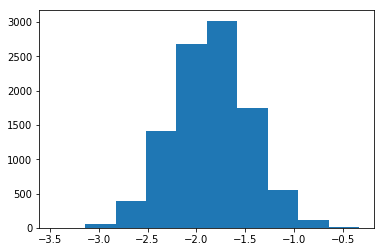

lower, upper : (-2.6136701999388614, -1.075162498976531)


In [93]:
boot_diff = []
for _ in range(10_000):
    nb_sample = 200
    boot_sample = sample_data.sample(nb_sample, replace=True)
    drink_mean = boot_sample.query("age == '<21' and drinks_coffee == True")['height'].mean()
    no_drink_mean = boot_sample.query("age == '<21' and drinks_coffee == False")['height'].mean()
    boot_diff.append(drink_mean - no_drink_mean)
plt.hist(boot_diff)
plt.show()
lower, upper = np.percentile(boot_diff, 2.5), np.percentile(boot_diff, 97.5)
pv("lower, upper")
pv("upper-lower")

#pv("full_data[(full_data['age'] == '>=21')]['height'].mean() - full_data[(full_data['age'] == '<21')]['height'].mean() ")


4. For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals over 21 years old. Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

(array([1.000e+01, 1.270e+02, 9.900e+02, 3.108e+03, 3.656e+03, 1.697e+03,
        3.560e+02, 4.700e+01, 7.000e+00, 2.000e+00]),
 array([-5.80729099, -5.16742569, -4.52756038, -3.88769507, -3.24782976,
        -2.60796445, -1.96809914, -1.32823383, -0.68836852, -0.04850321,
         0.5913621 ]),
 <a list of 10 Patch objects>)

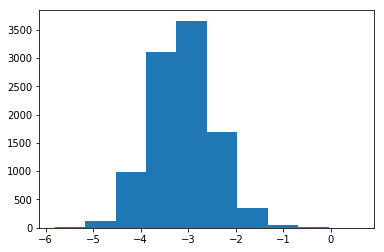

lower, upper : (-4.367928496025803, -1.8065555122633452)


In [94]:
boot_diff = []
for _ in range(10_000):
    nb_sample = 200
    boot_sample = sample_data.sample(nb_sample, replace=True)
    drink_mean = boot_sample.query("age == '>=21' and drinks_coffee == True")['height'].mean()
    no_drink_mean = boot_sample.query("age == '>=21' and drinks_coffee == False")['height'].mean()
    boot_diff.append(drink_mean - no_drink_mean)
plt.hist(boot_diff)
plt.show()
lower, upper = np.percentile(boot_diff, 2.5), np.percentile(boot_diff, 97.5)
pv("lower, upper")
pv("upper-lower")

# Traditional approaches

In [ ]:
import statsmodels.stats.api as sms
# sms.CompareMeans() => T-test

In [ ]:
print("")
print("")
print("")

In [ ]:
print("")
print("")
print("")